Regresión Lineal Simple: <p>

A continuación a manera de ejercicio se realizara una regresión lineal simple con datos obtenidos del "World Happiness Report" (WHR), el cual trata de medir la felicidad en diferentes países del mundo desde el 2012 y datos de "The world bank", para obtener el producto interno bruto (GDP) de los países ya que es una de las variables relevantes para estimar la felicidad.<p>

Los datos se pueden obtener en las páginas oficiales, sin embargo, han sido modificados para poder manipularse con mayor facilidad, si deseas consultar los datos oficiales, encontraras las referencias al final del documento. Si deseas simplemente verificar los resultados del código el archivo con los datos se encuentra en este proyecto.<p>


La base de datos cuenta con la siguiente información: <p>
-“País”. Se describe el nombre del país. <p>
-“Felicidad”. Un número entre 0 y 10 que describe el nivel de felicidad. <p>
-“GDP”. Un número que describe el producto interno bruto.<p><p>

Iniciaremos preparando nuestro ambiente de trabajo, importando librerías y la base de datos, para familiarizarnos con ella mostraremos los primeros 10 datos de diferentes formas.

In [29]:
#Se importa la libreria de pandas como pd
import pandas as pd 

#Leemos la base de datos y la almacenamos en df
df = pd.read_csv("data1_2.csv") 

#Acomodamos nuestra base de datos de acuerdo a lo que queremos mostrar
df = df.sort_values( 'GDP', ascending = False)

#Mostramos los 10 primeros datos
print ("Datos de mayor a menor GDP: \n", df.head(10), "\n")

df = df.sort_values( 'Felicidad', ascending = False)
print ("Datos de mayor a menor Felicidad: \n", df.head(10), "\n")

Datos de mayor a menor GDP: 
                Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12 

Datos de mayor a menor Felicidad: 
           Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+

In [30]:
#Se utiliza otra celda de código para no sobre saturar la consola.
df = df.sort_values( 'GDP', ascending = True)
print ("Datos de menor a mayor GDP: \n", df.head(10), "\n")

df = df.sort_values( 'Felicidad', ascending = True)
print ("Datos de menor a mayor Felicidad: \n", df.head(10), "\n")

Datos de menor a mayor GDP: 
              Pais  Felicidad           GDP
111       Comoros     4.6086  1.223876e+09
89         Gambia     5.1636  1.830413e+09
135       Lesotho     3.5118  2.250718e+09
93        Liberia     5.1215  3.039983e+09
119      Eswatini     4.3961  3.984841e+09
134  Sierra Leone     3.5740  4.063289e+09
73     Montenegro     5.5468  4.780722e+09
129          Togo     4.1123  7.574637e+09
30         Kosovo     6.4551  7.716925e+09
62     Kyrgyzstan     5.8285  7.780875e+09 

Datos de menor a mayor Felicidad: 
              Pais  Felicidad           GDP
140   Afghanistan     2.4038  2.011614e+10
139       Lebanon     2.9553  2.594892e+10
138      Zimbabwe     2.9951  1.805117e+10
137        Rwanda     3.2682  1.018435e+10
136      Botswana     3.4711  1.493007e+10
135       Lesotho     3.5118  2.250718e+09
134  Sierra Leone     3.5740  4.063289e+09
133      Tanzania     3.7024  6.240971e+10
132        Malawi     3.7504  1.217213e+10
131        Zambia     3.7598 

In [31]:
#Importamos la libreria de numpy
import numpy as np

#Definimos a "y" como los valores de felicidad
y = df["Felicidad"]

#Definimos a "x" como el logaritmo base 10 del valor del GDP, para obtener datos más legibles usando numpy
x = np.log10(df["GDP"])

Se realiza a grafica que compara el nivel de felicidad indicado como variable dependiente del GDP, la variable independiente.

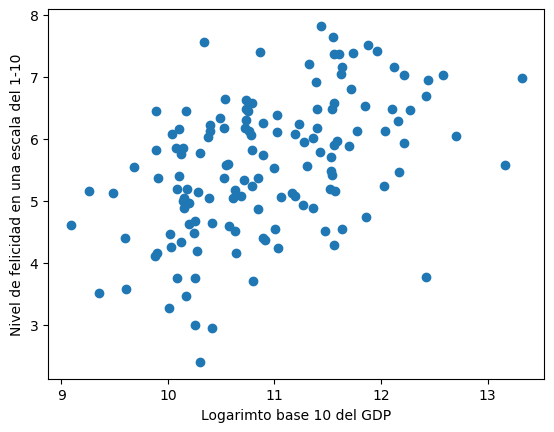

In [32]:
# Esta funcion nos ayuda a que todo se vea bien en jupyter notebook
%matplotlib inline
# Importa la librería matplotlib.pyplot, usando plt como sinónimo
import matplotlib.pyplot as plt
# Usa la función scatter para generar una gráfica de dispersión
plt.scatter(x,y)
# Etiqueta el eje y"
plt.ylabel("Nivel de felicidad en una escala del 1-10")
# Etiqueta el eje x"
plt.xlabel("Logarimto base 10 del GDP")
# Muestra la gráfica usando la función show
plt.show()

Se calculan los valores de $\beta0$ y $\beta1$ de la siguiente ecuación: <p>

$\hat{y}$ = $\beta0$ + $\beta1X$



In [33]:
#Calculamos el promedio de X
xBar = np.mean(x)

#Calculamos el promedio de y
yBar = np.mean(y)

#Es el numerador de B1 para evitar errores
B1num = sum((x-xBar)*(y-yBar))

#Es el denominador de B1 para evitar errores
B1den = sum((x-xBar)**2)

# Calcula B1 como la proporción entre el numerador y el denominador
B1 = B1num/B1den

# Calcula B0
B0 = yBar-(B1*xBar)

# Imprime el valor de B0
print ("Coeficientes obtenidos: ")
print("B0 = ", B0 )

# Imprime el valor de B1
print("B1 = ", B1)

Coeficientes obtenidos: 
B0 =  -1.3023500570747277
B1 =  0.6281284658810408


Se realiza la gráfica y se muestra el resultado de la ecuación cuyos coeficientes acabamos de obtener. 

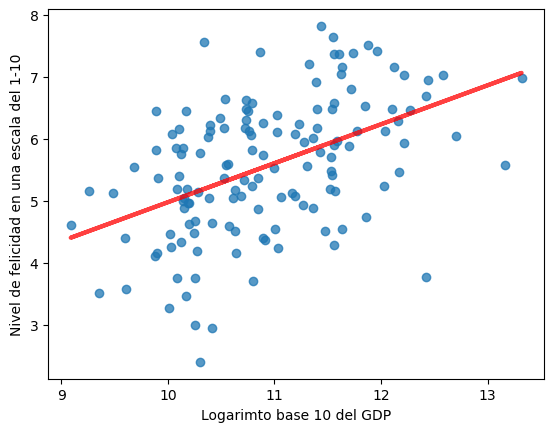

In [34]:
# Código para replicar la gráfica anterior
plt.scatter(x,y, alpha=0.75)
plt.ylabel("Nivel de felicidad en una escala del 1-10")
plt.xlabel("Logarimto base 10 del GDP")


# Estimación dada nuestra ecuación
yHat = B0 + B1*x
# Agrega la línea que representa al modelo con la función plot
plt.plot(x,yHat, c= "r", linewidth = "3", alpha = 0.75)
# Muestra la gráfica usando la función show
plt.show()

In [35]:
#Se realiza el calculo del RSS
RSS = sum((y-yHat)**2)
# Imprime el valor de RSS
print("RSS =", RSS)

RSS = 131.3738317732635


Se calcula el error estándar (SE) de $\beta1$, el cual es de utilidad para juzgar la confianza de $\beta1$ y será crucial para encontrar su intervalo de confianza.

In [36]:
# Se obtiene el numero de muestras
n = len(x)
# Se calcula el error estándar
SEB1 = np.sqrt(RSS/((n-2)*sum((x-xBar)**2)))
# Imprime el valor de SEB1
print( "SEB1 =", SEB1)

SEB1 = 0.09983378435340727


Ahora se calcula el intervalo de confianza de $\beta1$ haciendo uso del error estándar de dicha variable.

In [37]:
# Importa la librería scipy.stats con sinónimo st
import scipy.stats as st
# Calcula el percentil con "t.interval"
per = st.t.interval(0.95, n-2)[1]
# Calcula el límite inferior
CIlow = B1 - per*SEB1
# Calcula el límite superios
CIhigh = B1 + per*SEB1
# Imprime el intervalo de confianza
print( "Intervalos de confianza: \nCIlow =", CIlow, " CIhighc=", CIhigh)

Intervalos de confianza: 
CIlow = 0.4307393313073311  CIhighc= 0.8255176004547504


Podemos decir con un 95% de seguridad que por cada aumento unitario en el logaritmo base 10 del GDP la felicidad aumenta entre 0.4307 y 0.8255 puntos.<p>

Ahora se determinará si existe alguna asociación entre la felicidad y el logaritmo base 10 del GDP, para esto realizaremos una prueba de hipótesis:<p>
Hipótesis nula (H0): $\beta1$ = 0 <p>
Hipótesis alternativa (H1): $\beta1$ $\neq$ 0 <p>

Para poder determinar esto debemos de obtener el estadístico t, para posteriormente obtener el valor de p, para una función t de student con n-2 grados de libertad. <p>
Una vez tengamos estos valores vamos a comparar el valor p con el de alpha en este caso de 0.05, lo que implica que tiene una certeza del 95%, si el valor de p es menor podemos decir que se rechaza la hipótesis nula y podemos presumir que si existe una relación entre la felicidad y el GDP.  


In [38]:
# Calcula el estadístico t
t = B1 / SEB1
# Calcula el p-value asociado
p = st.t.sf(abs(t),n-2)*2
# Muestra en consola el resultado del estadístico t
print ( "Valor de t-statisic=",t)
# Muestra en consola el resultado del p-value
print ("Valor de p-value=",p, "\n")

if p<0.05:
    print("Se rechaza la hipótesis nula, se tiene una confianza del 95% de que existe una relación entre la felicidad y el GDP")
else:
    print("No se rechaza la hipótesis nula, puede no existir relación entre la felicidad y el GDP")

Valor de t-statisic= 6.291742519320846
Valor de p-value= 3.825717831968765e-09 

Se rechaza la hipótesis nula, se tiene una confianza del 95% de que existe una relación entre la felicidad y el GDP


A continuación, se calcula el RSE (Residual standar error) el cual estima la desviación estándar de error.
y el R^2, la cual nos indica que proporción del comportamiento de "y", el índice de felicidad se explica por x, el logaritmo base 10 del GDP. 

In [39]:
# Calculo del RSE
RSE = np.sqrt(RSS/(n-2))
# Calculo del TSS
TSS = sum((y-yBar)**2)
# Calculo de R^2
R2 = 1-RSS/TSS
# Imprime el valor del RSE
print ("Valor de RSE =",RSE)
# Imprime el valor de R^2
print ( "Valor de R^2 =", R2)

print("\nMi opinión sobre el resultado de R^2")
print("Parece ser que la variable dependiente está muy poco representada por la variable independiente,")
print("aún así, encontramos que se rechaza la hipótesis nula con el 95% de confianza, por lo cual concluyo que si existe una relación relevante entre las variables")
print("pero que pueden existir mejores modelos para utilizar con fines predictivos, para fines estadísticos este modelo es ideal por su interpretabilidad")


Valor de RSE = 0.9721807858537376
Valor de R^2 = 0.22166361654970657

Mi opinión sobre el resultado de R^2
Parece ser que la variable dependiente está muy poco representada por la variable independiente,
aún así, encontramos que se rechaza la hipótesis nula con el 95% de confianza, por lo cual concluyo que si existe una relación relevante entre las variables
pero que pueden existir mejores modelos para utilizar con fines predictivos, para fines estadísticos este modelo es ideal por su interpretabilidad


Ahora comprobaremos los resultados de los cálculos anteriores haciendo uso de librerías especializadas.

In [40]:
# Importa la librería statsmodels.api con el sinónimo sm
import statsmodels.api as sm
# Genera un ordinary least squares, recuerda usar la función add_constant()
model = sm.OLS(y,sm.add_constant(x))
# Ajusta el modelo
results = model.fit()
# Imprime el resultado de aplicar la función summary() a la variable results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        00:20:46   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

Podemos observar que los datos obtenidos anteriormente concuerdan con los datos de la función, por lo cual concluyo que los procedimientos realizados fueron adecuados. Adelante verificaremos valores que no aparecen en el sumario.

In [41]:
print("\np-values: ")

#Imprime más cifras de los p-values
print(results.pvalues)

#Imprime el RSE, ya que no se muestra por default en el sumario
print("\nRSE =", results.scale**.5)


p-values: 
const    2.357975e-01
GDP      3.825718e-09
dtype: float64

RSE = 0.9721807858537376


Podemos darnos cuenta de que los valores del RSE y el p-value de $\beta1$​ son los mismos que los que calculamos originalmente.<p>
Observamos que no se rechaza la hipótesis nula del p-value de $\beta0$​, lo cual sugiere que no hay una relación significativa entre las variables "x" (logaritmo del PIB) y "y" (nivel de felicidad) en términos del valor de la constante. Esto tiene sentido, ya que el intercepto representa el valor de la felicidad cuando el logaritmo del PIB es cero (es decir, cuando el PIB es 1), lo cual puede no ser relevante en el contexto de los datos y el modelo.<p>

Recapitulando los resultados obtenidos se da por finalizado este ejercicio:

In [42]:
print("B1 =", B1)
print("B0 =", B0)
print("RSE =", RSE)
print("R^2 =", R2)

B1 = 0.6281284658810408
B0 = -1.3023500570747277
RSE = 0.9721807858537376
R^2 = 0.22166361654970657


Podemos decir con un 95% de seguridad de que por cada aumento unitario en el logaritmo base 10 del GDP la felicidad aumenta entre 0.4307 y 0.8255 puntos.<p>

Agradezco al lector por su tiempo: <p>
-Armando Rdz

Referencias:

Datos sobre la felicidad (WHR):<p>
https://worldhappiness.report/ed/2022/#appendices-and-data <p>

Datos sobre el GDP (The world bank): <p>
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD <p>